# Biodiversity portfolio project

For this project, you will interpret data from the National Parks Service about endangered species in different parks.

You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered. During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in a meaningful way.

After you perform your analysis, you will share your findings about the National Park Service

You have been given two CSV files:

- *species_info.csv* - contains data about different species and their conservation status
- *observations.csv* - holds recorded sightings of different species at several national parks for the past 7 days.

###### Data Source: 
The data was provided by codecademy.com. The data is fictional, but *inspired* by real data.


## Project scoping

Properly scoping your project will greatly benefit you; scoping creates structure while requiring you to think through your entire project before you begin. You should start with stating the goals for your project, then gathering the data, and considering the analytical steps required. A proper project scope can be a great road map for your project, but keep in mind that some down-stream tasks may become dead ends which will require adjustment to the scope. 

#### Goals
We want to see which species in national parks are at risk and which are safe in order to maintain the biodiversity of the park. 
Our main goal is to see which species are endagered and should should be protected.

*The questions to pose*:
- What is the distribution of conservation_status for animals?
- Are certain types of species more likely to be endangered?
- Are the differences between species and their conservation status significant?
- Which species were spotted the most at each park?
- *Which park has most endangered species!*

#### Data
There are 2 csv files that we can use. One set has information about the species and the other about the observations at each park.


#### Analysis
A combination of discriptive statistics and visualisation will be used to understand the data. We will also use statistical inference to see if the data is significant. Some key metrics that will be used are counts, distribution, relationship between species, conservation status of species, observation status of species and observation of endangered species in each park. 

#### Evaluation
We will reflect on our data and see if the output corresponds with the questions we want to answer and even if we can make recommendations for the future. 

### Import Python Modules
Before we start, it's important to import the necessary python modules

In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import math
from scipy.stats import chi2_contingency

### Loading and exploring the Data
The .csv data needs to be loaded into dataframes before we can use it for analysis.
The `Species_info.csv` and the `Observations.csv` will be loaded as `DataFrames` called `species` and `observations` respectively. The dataframes will be explored and inspected with `.head()`, `.describe()` and `.info()`

#### Species
First the `species_info.csv` file. Load and explore using `.head()`. 

Exploring the `species` dataframe shows the following columns:
- **category** - the taxonomy of the species
- **scientific_name** - the scientific name of the species
- **common_names** - the common names of the species
- **conservation_status** - the conservation status for the species. 

The species file contains 5824 entries. There are 7 categories `['Mammal', 'Bird', 'Reptile',  'Amphibian', 'Fish', 'Vascular Plant', 'Nonvascular Plant']` and 4 conservation statuses `[nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']`. It is worth noticing that there are `NaN` values in the conservation status. 

In [137]:
species = pd.read_csv('species_info.csv')
species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [138]:
species.info()

species.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             5824 non-null   object
 1   scientific_name      5824 non-null   object
 2   common_names         5824 non-null   object
 3   conservation_status  191 non-null    object
dtypes: object(4)
memory usage: 182.1+ KB


,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,191
unique,7,5541,5504,4
top,Vascular Plant,Streptopelia decaocto,Brachythecium Moss,Species of Concern
freq,4470,3,7,161


In [139]:
list(species.category.unique())

['Mammal',
 'Bird',
 'Reptile',
 'Amphibian',
 'Fish',
 'Vascular Plant',
 'Nonvascular Plant']

In [140]:
list(species.conservation_status.unique())

[nan, 'Species of Concern', 'Endangered', 'Threatened', 'In Recovery']

In [141]:
species.scientific_name.nunique()

5541

### Observation
Next we'll load and inspect the `observations.csv` file. The DataFrame will be named `obs`.

The `obs` dataframe contains the following columns:

- **scientific_name** - scientific name of the species
- **park_name** - the name of the park
- **observations** -  the number of observations in the specified park

As we can see from the observation file it contains 23269 entries. Further exploration shows that the number of scientific names is equal to the species file (`5541`). There are 4 unique parks in the file `['Great Smoky Mountains National Park', 'Yosemite National Park', 'Bryce National Park', 'Yellowstone National Park']`.

In [142]:
obs = pd.read_csv("observations.csv")
obs.head()

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85


In [143]:
obs.info()

obs.describe()

obs.scientific_name.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB


count                     23296
unique                     5541
top       Streptopelia decaocto
freq                         12
Name: scientific_name, dtype: object

In [144]:
list(obs.park_name.unique())

['Great Smoky Mountains National Park',
 'Yosemite National Park',
 'Bryce National Park',
 'Yellowstone National Park']

In [145]:
obs.scientific_name.nunique()

5541

### Analysis

Next up we can start to analyse the data. 
One of the questions we want answered is the *distribution of conservation status*. In relation to that we want to see if there *are certain types of species that are more endangered*. 

We will first have to clean the data. As we saw before there are NaN values in the conservation status, which we will have to tackle. For this analysis we will asume that the species with no value are not endangered and we will therefore will not need intervention. We will replace the `NaN` with `LC` as in *least concern*

We can then group the data by conservation_status and category. 

In [146]:
species.fillna('LC', inplace=True)
species.describe()

,category,scientific_name,common_names,conservation_status
count,5824,5824,5824,5824
unique,7,5541,5504,5
top,Vascular Plant,Streptopelia decaocto,Brachythecium Moss,LC
freq,4470,3,7,5633


In [171]:
spec = species[species.conservation_status != 'LC'].groupby(['conservation_status', 'category']).scientific_name.count().unstack()

spec

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
conservation_status,,,,,,,
Endangered,1.0,4.0,3.0,7.0,NaN,NaN,1.0
In Recovery,NaN,3.0,NaN,1.0,NaN,NaN,NaN
Species of Concern,4.0,72.0,4.0,28.0,5.0,5.0,43.0
Threatened,2.0,NaN,4.0,2.0,NaN,NaN,2.0


<Figure size 720x576 with 0 Axes>

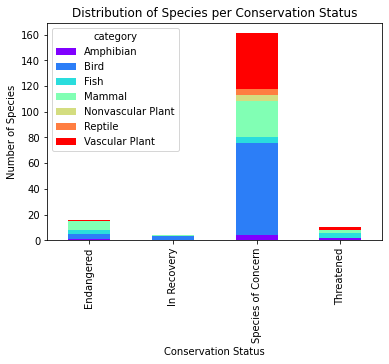

In [180]:
colors = sns.color_palette('rainbow', n_colors=len(species.category))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)

plt.figure(figsize=(10,8))
ax = specCon.plot(kind='bar', stacked=True, colormap=cmap1)
plt.title("Distribution of Species per Conservation Status")
ax.set_xlabel('Conservation Status')
ax.set_ylabel('Number of Species')
plt.show()

We see that the most species are in the category `Species of Concern`. `Bird` and `Vascular Plants` seem to be abundant there. We also want to explore which species are the most in need of protection. We can count `LC` as no need for protecion and make a new column where we count the need for protection for each species.

In [202]:
species['protected'] = species.conservation_status != 'LC'
species.head()


,category,scientific_name,common_names,conservation_status,protected
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,LC,False
1,Mammal,Bos bison,"American Bison, Bison",LC,False
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",LC,False
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",LC,False
4,Mammal,Cervus elaphus,Wapiti Or Elk,LC,False


In [261]:
species.conservation_status.describe()

count     5824
unique       5
top         LC
freq      5633
Name: conservation_status, dtype: object

In [203]:
sp = species.groupby(['category', 'protected']).scientific_name.nunique().reset_index().pivot(columns='protected', index='category', values='scientific_name').reset_index()
sp.columns= ['category', 'not_protected', 'protected']
sp

,category,not_protected,protected
0,Amphibian,72,7
1,Bird,413,75
2,Fish,115,11
3,Mammal,146,30
4,Nonvascular Plant,328,5
5,Reptile,73,5
6,Vascular Plant,4216,46


In [252]:
protectedx = sp.protected.sum()
protectedx

protectedn = sp.not_protected.sum()
protectedn

5363

We want to see the protection status percentage wise and if it is significant. 

In [199]:
sp['perc_protected'] = (sp.protected/(sp.protected + sp.not_protected))*100
sp

,category,not_protected,protected,perc,perc_protected
0,Amphibian,72,7,91.139241,8.860759
1,Bird,413,75,84.631148,15.368852
2,Fish,115,11,91.269841,8.730159
3,Mammal,146,30,82.954545,17.045455
4,Nonvascular Plant,328,5,98.498498,1.501502
5,Reptile,73,5,93.589744,6.410256
6,Vascular Plant,4216,46,98.920695,1.079305


We see that `Birds` and `Mammal` are the most protected species percentage wise (15% and 17% respectively) and `Nonvascular Plants` and `Vascular Plants` the least. We will have to test if this is significant using some chi squared test. First we will compare mammals and birds. Secondly we will compare mammals with nonvascular plants. With the chi2_contingency test we will see if this is significant. The second value is the p-value, which shows if this is significant (p < 0.05).
To run a chi squared test a contigency table should be created. It looks like this:

||protected|not protected|
|-|-|-|
|Mammal|?|?|
|Bird|?|?|

The relation between birds and mammals is not significant, p-value 0.69
The relation between mammals and nonvascular plants is significant, with p<0.001.

In [204]:
cont_mb = [[30, 146], [75, 413]]
chi2_contingency(cont_mb)

(0.1617014831654557,
 0.6875948096661336,
 1,
 array([[ 27.8313253, 148.1686747],
        [ 77.1686747, 410.8313253]]))

In [209]:
cont_mn = [[30, 146], [5, 328]]
chi2_contingency(cont_mn)

(41.0526001992972,
 1.481868915759314e-10,
 1,
 array([[ 12.1021611, 163.8978389],
        [ 22.8978389, 310.1021611]]))

Next we want to see which species were spotted most at each park. As the `obs` dataframe only contains the scientific_name, we will have to join the 2 dataframes to get the categories. We will name the newly formed dataframe `combo`. After that we will group the species by park and make a stacked barchart of the grouped dataframe.

In [211]:
combo = species.join(obs.set_index('scientific_name'), on='scientific_name')
combo.head()

,category,scientific_name,common_names,conservation_status,protected,park_name,observations
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,LC,False,Bryce National Park,130
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,LC,False,Yellowstone National Park,270
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,LC,False,Great Smoky Mountains National Park,98
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,LC,False,Yosemite National Park,117
1,Mammal,Bos bison,"American Bison, Bison",LC,False,Yosemite National Park,128


In [213]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25632 entries, 0 to 5823
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   category             25632 non-null  object
 1   scientific_name      25632 non-null  object
 2   common_names         25632 non-null  object
 3   conservation_status  25632 non-null  object
 4   protected            25632 non-null  bool  
 5   park_name            25632 non-null  object
 6   observations         25632 non-null  int64 
dtypes: bool(1), int64(1), object(5)
memory usage: 1.4+ MB


In [215]:
combo.describe()

,observations
count,25632.000000
mean,142.214693
std,69.912475
min,9.000000
25%,86.000000
50%,124.000000
75%,195.000000
max,321.000000


In [216]:
park_spec = combo.groupby(['park_name', 'category']).observations.sum().unstack()
park_spec

category,Amphibian,Bird,Fish,Mammal,Nonvascular Plant,Reptile,Vascular Plant
park_name,,,,,,,
Bryce National Park,7542,58590,12823,28830,32992,8141,484373
Great Smoky Mountains National Park,5876,42869,9482,21056,24857,5841,364882
Yellowstone National Park,19937,144300,31459,70701,83021,20061,1218162
Yosemite National Park,11713,86612,19137,42533,49783,11779,727895


<Figure size 720x576 with 0 Axes>

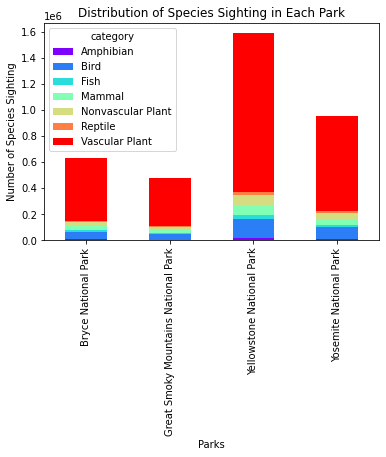

In [217]:
colors = sns.color_palette('rainbow', n_colors=len(species.category))
cmap1 = LinearSegmentedColormap.from_list("my_colormap", colors)

plt.figure(figsize=(10,8))
ax = park_spec.plot(kind='bar', stacked=True, colormap=cmap1)
plt.title("Distribution of Species Sighting in Each Park")
ax.set_xlabel('Parks')
ax.set_ylabel('Number of Species Sighting')
plt.show()

In [231]:
prot_park = combo.groupby(['park_name', 'protected']).observations.sum().reset_index()
prot_park

,park_name,protected,observations
0,Bryce National Park,False,614682
1,Bryce National Park,True,18609
2,Great Smoky Mountains National Park,False,462047
3,Great Smoky Mountains National Park,True,12816
4,Yellowstone National Park,False,1543058
5,Yellowstone National Park,True,44583
6,Yosemite National Park,False,922539
7,Yosemite National Park,True,26913


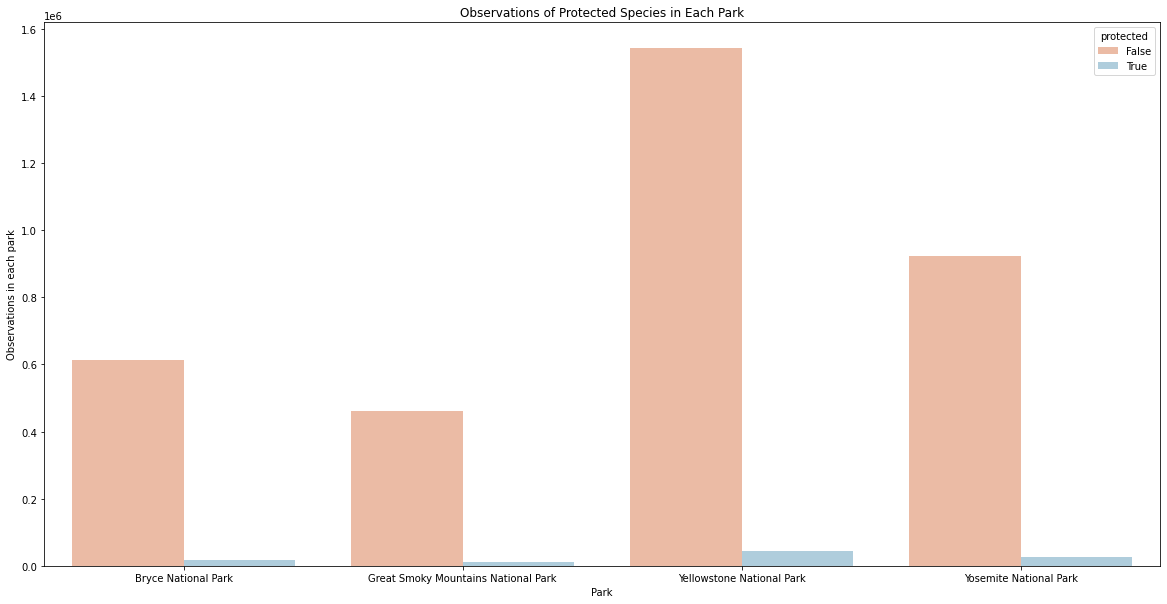

In [240]:
plt.figure(figsize=(20,10))
sns.barplot(data=prot_park, x='park_name', y='observations', hue='protected', palette='RdBu')
plt.xlabel("Park")
plt.ylabel("Observations in each park")
plt.title("Observations of Protected Species in Each Park")
plt.show()

In [250]:
prot_park_perc = combo.groupby(['park_name', 'protected']).observations.sum().unstack().reset_index()
prot_park_perc.columns = ['park_name', 'not_protected', 'protected']
prot_park_perc['perc'] = (prot_park_perc.protected/(prot_park_perc.protected + prot_park_perc.not_protected))*100
prot_park_perc

,park_name,not_protected,protected,perc
0,Bryce National Park,614682,18609,2.938460
1,Great Smoky Mountains National Park,462047,12816,2.698884
2,Yellowstone National Park,1543058,44583,2.808129
3,Yosemite National Park,922539,26913,2.834582


It seems that in absolute values the yellowstone national park has the most sightings of endangered species. However, percentage wise there is a similar distribution across all parks.

### Conclusions
Our job was to answer the following questions:

##### What is the distribution of conservation_status for animals?
The most species were not in conservation status (5633). Plants (vascular and nonvascular) are the biggest group.
##### Are certain types of species more likely to be endangered?
Mammals and birds had the highest percentage of protections. 
##### Are the differences between species and their conservation status significant?
Yes the conservation status between mammals and nonvascular plants were significant. The conservation status between birds and mammals was not. 
##### Which species were spotted the most at each park?
Plants were observed most at each park. 
##### Which park has most endangered species!*
In absolute numbers Yellowstone National Park has the most sightings of endangered species. However this was not the case percentage wise where distribution seems to be even across the parks. 